In [27]:
# 라이브러리 설치
!pip install gdrive_dataset

from gdrivedataset import loader

file_id = "1vj0tPbM6f67xbvquYvtsQ5tyYbP9vQHw"
loader.load_from_google_drive(file_id)

========== files ============

data/소득예측경진대회



In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [29]:
DATA_DIR = "./data/소득예측경진대회"
train = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))
test = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))
submission = pd.read_csv(os.path.join(DATA_DIR, "sample_submission.csv"))

In [30]:
train.head()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
1,1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
2,2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
3,3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
4,4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17480 entries, 0 to 17479
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              17480 non-null  int64 
 1   age             17480 non-null  int64 
 2   workclass       15644 non-null  object
 3   fnlwgt          17480 non-null  int64 
 4   education       17480 non-null  object
 5   education.num   17480 non-null  int64 
 6   marital.status  17480 non-null  object
 7   occupation      15637 non-null  object
 8   relationship    17480 non-null  object
 9   race            17480 non-null  object
 10  sex             17480 non-null  object
 11  capital.gain    17480 non-null  int64 
 12  capital.loss    17480 non-null  int64 
 13  hours.per.week  17480 non-null  int64 
 14  native.country  16897 non-null  object
 15  target          17480 non-null  object
dtypes: int64(7), object(9)
memory usage: 2.1+ MB


In [32]:
def check_missing_value(df):
  missing_values = df.isnull().sum().sort_values(ascending=False)
  missing_percentage = (missing_values / len(df)) * 100
  result = pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing values', '% Missing'])
  display(result)
check_missing_value(train)

,Missing values,% Missing
occupation,1843,10.543478
workclass,1836,10.503432
native.country,583,3.335240
id,0,0.000000
age,0,0.000000
fnlwgt,0,0.000000
education,0,0.000000
education.num,0,0.000000
marital.status,0,0.000000
relationship,0,0.000000


occupation, workclass, native.country 3개의 열에 결측치가 존재한다.  
occupation과 workclass의 null 개수가 비슷해서 둘 다 결측인 데이터가 많은지 확인했다.

In [33]:
print(train["occupation"].unique())
print(train["workclass"].unique())
print(train["native.country"].unique())

['Craft-repair' 'Exec-managerial' 'Adm-clerical' 'Prof-specialty'
 'Machine-op-inspct' 'Other-service' 'Sales' 'Farming-fishing'
 'Transport-moving' 'Handlers-cleaners' 'Tech-support' 'Protective-serv'
 'Priv-house-serv' 'Armed-Forces' nan]
['Private' 'State-gov' 'Local-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Federal-gov' 'Without-pay' nan 'Never-worked']
['United-States' 'Poland' 'Mexico' 'Ireland' 'Guatemala'
 'Dominican-Republic' 'Greece' 'El-Salvador' 'Portugal' 'Canada'
 'Philippines' 'India' 'Italy' 'England' 'Jamaica' 'Columbia' 'South'
 'Vietnam' 'Cuba' 'Laos' 'Hong' 'Haiti' 'Germany' 'Yugoslavia' 'Ecuador'
 'France' 'Puerto-Rico' 'Outlying-US(Guam-USVI-etc)' 'Taiwan' 'China'
 'Japan' 'Honduras' 'Peru' 'Nicaragua' 'Hungary' 'Cambodia' 'Iran'
 'Trinadad&Tobago' 'Thailand' 'Scotland' 'Holand-Netherlands' nan]


In [34]:
temp1 = train[train["occupation"].isnull()]
temp1.shape

(1843, 16)

In [35]:
temp2 = temp1[temp1["workclass"].isnull()]
temp2.shape

(1836, 16)

In [36]:
temp3 = temp1[temp1["native.country"].isnull()]
temp3.shape

(27, 16)

workclass가 결측인 데이터는 occupation도 결측인 것을 확인할 수 있다.  
native.country와도 중복인지 확인했는데 그건 아니었다.  
그래도 native.country는 결측치가 많지 않아서 결측인 행을 삭제하기로 했다.

In [37]:
train = train.dropna(axis=0)
train.shape

(15081, 16)

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15081 entries, 0 to 15080
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              15081 non-null  int64 
 1   age             15081 non-null  int64 
 2   workclass       15081 non-null  object
 3   fnlwgt          15081 non-null  int64 
 4   education       15081 non-null  object
 5   education.num   15081 non-null  int64 
 6   marital.status  15081 non-null  object
 7   occupation      15081 non-null  object
 8   relationship    15081 non-null  object
 9   race            15081 non-null  object
 10  sex             15081 non-null  object
 11  capital.gain    15081 non-null  int64 
 12  capital.loss    15081 non-null  int64 
 13  hours.per.week  15081 non-null  int64 
 14  native.country  15081 non-null  object
 15  target          15081 non-null  object
dtypes: int64(7), object(9)
memory usage: 2.0+ MB


In [39]:
train.describe()

,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,15081.00000,15081.000000,1.508100e+04,15081.000000,15081.000000,15081.000000,15081.000000
mean,7540.00000,38.455673,1.897891e+05,10.110802,1105.202772,85.466415,40.920828
std,4353.65404,13.158095,1.051112e+05,2.565325,7489.760601,397.661418,12.018513
min,0.00000,17.000000,1.882700e+04,1.000000,0.000000,0.000000,1.000000
25%,3770.00000,28.000000,1.177460e+05,9.000000,0.000000,0.000000,40.000000
50%,7540.00000,37.000000,1.782510e+05,10.000000,0.000000,0.000000,40.000000
75%,11310.00000,47.000000,2.381880e+05,13.000000,0.000000,0.000000,45.000000
max,15080.00000,90.000000,1.455435e+06,16.000000,99999.000000,4356.000000,99.000000


Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'target'],
      dtype='object')


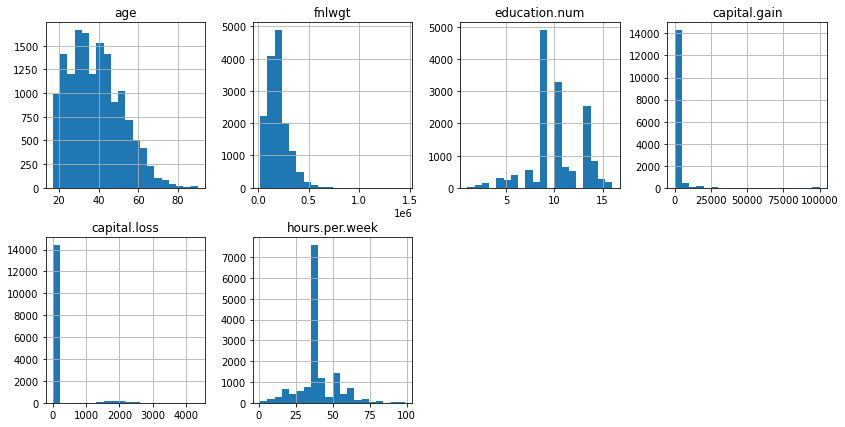

In [40]:
cols_list = train.columns[1:]
print(cols_list)

train[cols_list].hist(figsize=(14,7), grid=True, layout=(2,4), bins=20)
plt.show()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.077205,0.046755,0.074520,0.062110,0.094989
fnlwgt,-0.077205,1.000000,-0.030597,0.005209,-0.006366,-0.022501
education.num,0.046755,-0.030597,1.000000,0.120198,0.088330,0.146005
capital.gain,0.074520,0.005209,0.120198,1.000000,-0.031716,0.067452
capital.loss,0.062110,-0.006366,0.088330,-0.031716,1.000000,0.052145
hours.per.week,0.094989,-0.022501,0.146005,0.067452,0.052145,1.000000


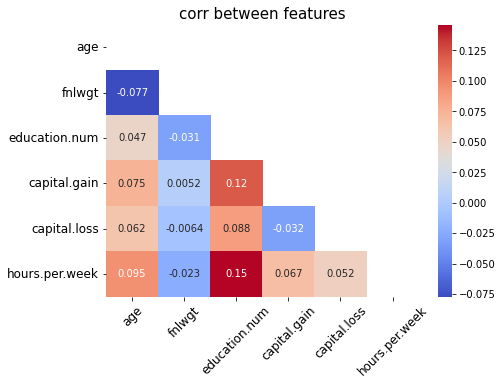

In [41]:
def corr_heat(df):
  plt.figure(figsize=(7, 5))

  corr_df = df.corr()
  display(corr_df)

  mask = np.zeros_like(corr_df)
  mask[np.triu_indices_from(mask)] = 1
  heat_map = sns.heatmap(corr_df, annot=True, mask=mask, cmap='coolwarm')
  heat_map.set_xticklabels(heat_map.get_xticklabels(), fontsize=12, rotation=45)
  heat_map.set_yticklabels(heat_map.get_yticklabels(), fontsize=12)
  plt.title('corr between features', fontsize=15)
  plt.show()

corr_heat(train[cols_list])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


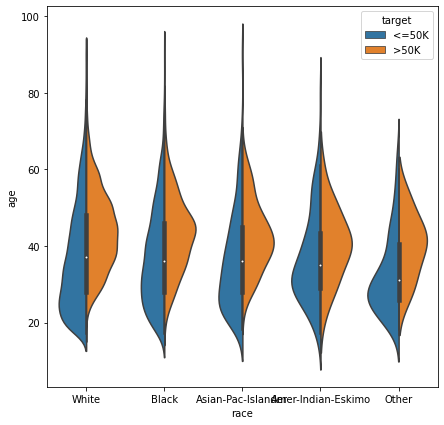

In [42]:
# 인종별 수입 분포
plt.figure(figsize=(7,7))
sns.violinplot('race', 'age', hue='target', data=train, split=True)

In [43]:
train.head()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
1,1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
2,2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
3,3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
4,4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [44]:
print(train['education'].nunique())
print(train['education.num'].nunique())

16
16


workclass, education, martial.status, occupation, relationshpe, race, sex, native.country는 categorical 변수이므로  
encoding을 통해 숫자로 변환한다.  
education은 education.num이 이미 있으므로 education col을 제거한다.

In [45]:
train = train.drop(['education'], axis=1)
test = test.drop(['education'], axis=1)

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
cat_col_list = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for col in cat_col_list:
  print(train[col].unique())

['Private' 'State-gov' 'Local-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Federal-gov' 'Without-pay']
['Married-civ-spouse' 'Never-married' 'Divorced' 'Separated'
 'Married-AF-spouse' 'Married-spouse-absent' 'Widowed']
['Craft-repair' 'Exec-managerial' 'Adm-clerical' 'Prof-specialty'
 'Machine-op-inspct' 'Other-service' 'Sales' 'Farming-fishing'
 'Transport-moving' 'Handlers-cleaners' 'Tech-support' 'Protective-serv'
 'Priv-house-serv' 'Armed-Forces']
['Husband' 'Own-child' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
['United-States' 'Poland' 'Mexico' 'Ireland' 'Guatemala'
 'Dominican-Republic' 'Greece' 'El-Salvador' 'Portugal' 'Canada'
 'Philippines' 'India' 'Italy' 'England' 'Jamaica' 'Columbia' 'South'
 'Vietnam' 'Cuba' 'Laos' 'Hong' 'Haiti' 'Germany' 'Yugoslavia' 'Ecuador'
 'France' 'Puerto-Rico' 'Outlying-US(Guam-USVI-etc)' 'Taiwan' 'China'
 'Japan' 'Honduras' 'Peru' 'Nicaragua' 'Hungary' '

In [48]:
encoder = LabelEncoder()
for col in cat_col_list:
  train[col] = encoder.fit_transform(train[col])
  test[col] = encoder.transform(test[col])

In [49]:
train.head()

,id,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,2,309513,12,2,2,0,4,1,0,0,40,38,<=50K
1,1,33,2,205469,10,2,3,0,4,1,0,0,40,38,>50K
2,2,46,2,149949,10,2,2,0,4,1,0,0,40,38,<=50K
3,3,23,2,193090,13,4,0,3,4,0,0,0,30,38,<=50K
4,4,55,2,60193,9,0,0,1,4,0,0,0,40,38,<=50K


In [50]:
test.head()

,id,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0,47,2,304133,10,2,3,0,4,1,0,0,45,38
1,1,34,3,154227,10,4,11,1,4,1,0,0,75,38
2,2,31,1,158291,13,4,2,1,4,1,8614,0,40,38
3,3,28,2,183155,13,2,9,0,4,1,0,0,55,38
4,4,54,1,182543,10,6,0,4,4,0,0,0,40,25


target도 encoding한다.

In [51]:
target_encoder = LabelEncoder()
train['target'] = target_encoder.fit_transform(train['target'])
train.head()

,id,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,2,309513,12,2,2,0,4,1,0,0,40,38,0
1,1,33,2,205469,10,2,3,0,4,1,0,0,40,38,1
2,2,46,2,149949,10,2,2,0,4,1,0,0,40,38,0
3,3,23,2,193090,13,4,0,3,4,0,0,0,30,38,0
4,4,55,2,60193,9,0,0,1,4,0,0,0,40,38,0


In [52]:
keys = target_encoder.classes_
values = target_encoder.transform(keys)
labels = dict(zip(keys, values))
labels

{'<=50K': 0, '>50K': 1}

In [97]:
x_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']
x_test = test.drop(['id'], axis=1)

In [69]:
#y_train = np.asarray(y_train).astype('int64').reshape(-1, 1)

In [75]:
y_train.shape

(15081,)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(
    [
     layers.Dense(1024, activation='relu', input_shape=(13, )),
     layers.Dense(512, activation='relu'),
     layers.Dense(128, activation='relu'),
     layers.Dense(1, activation='relu'),
    ]
)
model.summary()

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_split=0.2)

In [92]:
from sklearn.linear_model import LogisticRegression

In [98]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [94]:
y_predict

array([0, 0, 1, ..., 0, 0, 0])

In [100]:
submission['target'] = y_predict
submission.to_csv('submission1.csv', index=False)